In [1]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.6 MB/s eta 0:00:00


In [2]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=baa575f8577fa2b25b4e5ad5a280fc04da919ed297e999a29059804fb5341f49
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier 
import category_encoders as ce
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from random import randint,uniform
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import graphviz
from sklearn.tree import export_graphviz

<ipython-input-3-475722ef3270>:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [4]:
def summary(df):
    
    # Data Cleaning: dropna, fillna
    # Identify Null Values
    # Note: Data Preprocessing(StandardScaler/MinMaxScaler) 
    #       & Impute Values (SimpleImputer) are covered in pipeline section
    
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

def readfile(filepath):
    
    tempds = pd.read_csv(filepath)
    print(tempds.head())
    print(tempds.shape)

    # Call summary function to print
    print(summary(tempds))
    print('/n')
    tempds.drop(columns='id', axis=1, inplace=True)
    print(tempds.shape)
    
    return tempds


In [5]:
train_url = 'train.csv'
test_url = 'test.csv'
sample_url = 'sample_submission.csv'
        
# First step to read train, test and sample files.
print('\n*** Training Data preprocessing summary ***')
train = readfile(train_url)
print('\n*** Test Data preprocessing summary ***')
test = readfile(test_url)
print('\n*** Sample Data preprocessing summary ***')
sample_submission = readfile(sample_url)

train.head()




*** Training Data preprocessing summary ***
   id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1
(414, 8)
data shape: (414, 8)
        data type  #missing  %missing  #unique      min      max  first value  \
id          int64         0       0.0      414    0.000   413.00        0.000   
gravity   float64         0       0.0       28    1.005     1.04        1.013   
ph        float64         0       0.0       71    4.760     7.94        6.190   
osmo        int64         0       0.0       80  187.000  1236.00      443.000   
cond      float64         0       0.0       65    5.100    38.00       14.800   
urea        int64         0       0.0       73   10.000   620.00      124.000   
calc      float64         0       0.0   

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


In [6]:
train.target.value_counts(normalize=True)

0    0.555556
1    0.444444
Name: target, dtype: float64

In [7]:
train.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [8]:
sample_submission.describe()

,target
count,276.0
mean,0.5
std,0.0
min,0.5
25%,0.5
50%,0.5
75%,0.5
max,0.5


In [9]:
pp.ProfileReport(train)

Output hidden; open in https://colab.research.google.com to view.

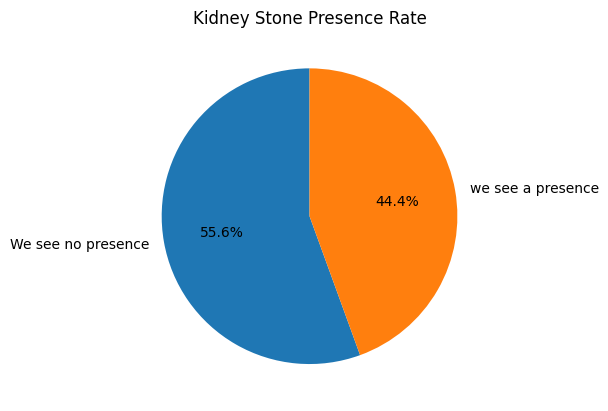

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

presence_prop = pd.DataFrame(train['target'].value_counts(normalize=True))
presence_pct = presence_prop * 100
presence_pct = presence_pct.rename(index={0:'We see no presence', 1: 'we see a presence'})
presence_pct

fig, ax = plt.subplots()

ax.pie(presence_pct['target'],
       labels=presence_pct.index, 
       autopct='%1.1f%%', 
       startangle=90)
#Autopct causes the percents to be rounded. Startangle causes the starting place
#on the pie chart to be vertical

ax.set_title('Kidney Stone Presence Rate')
plt.show()

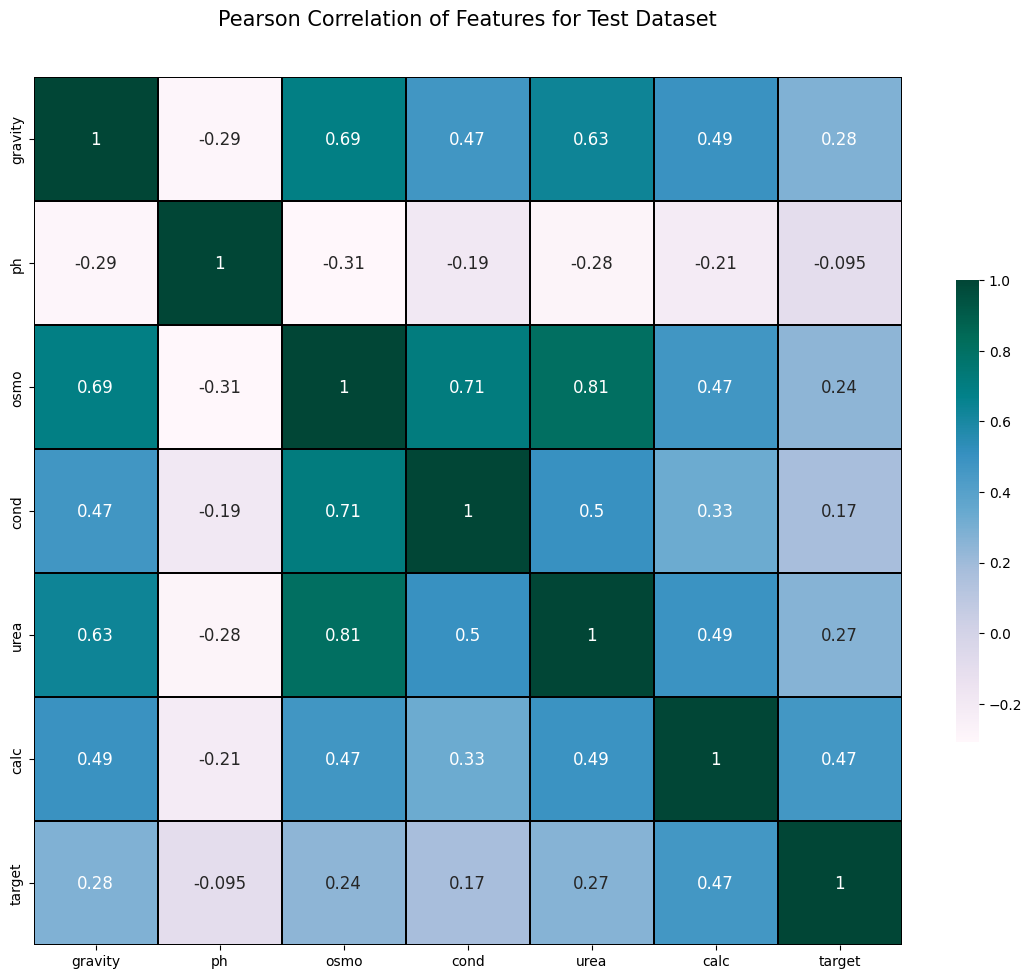

In [11]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap= 'PuBuGn', #cmap = "RdYlGn",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features for Test Dataset', y=1.05, size=15)

correlation_heatmap(train)

<Figure size 1200x1000 with 0 Axes>

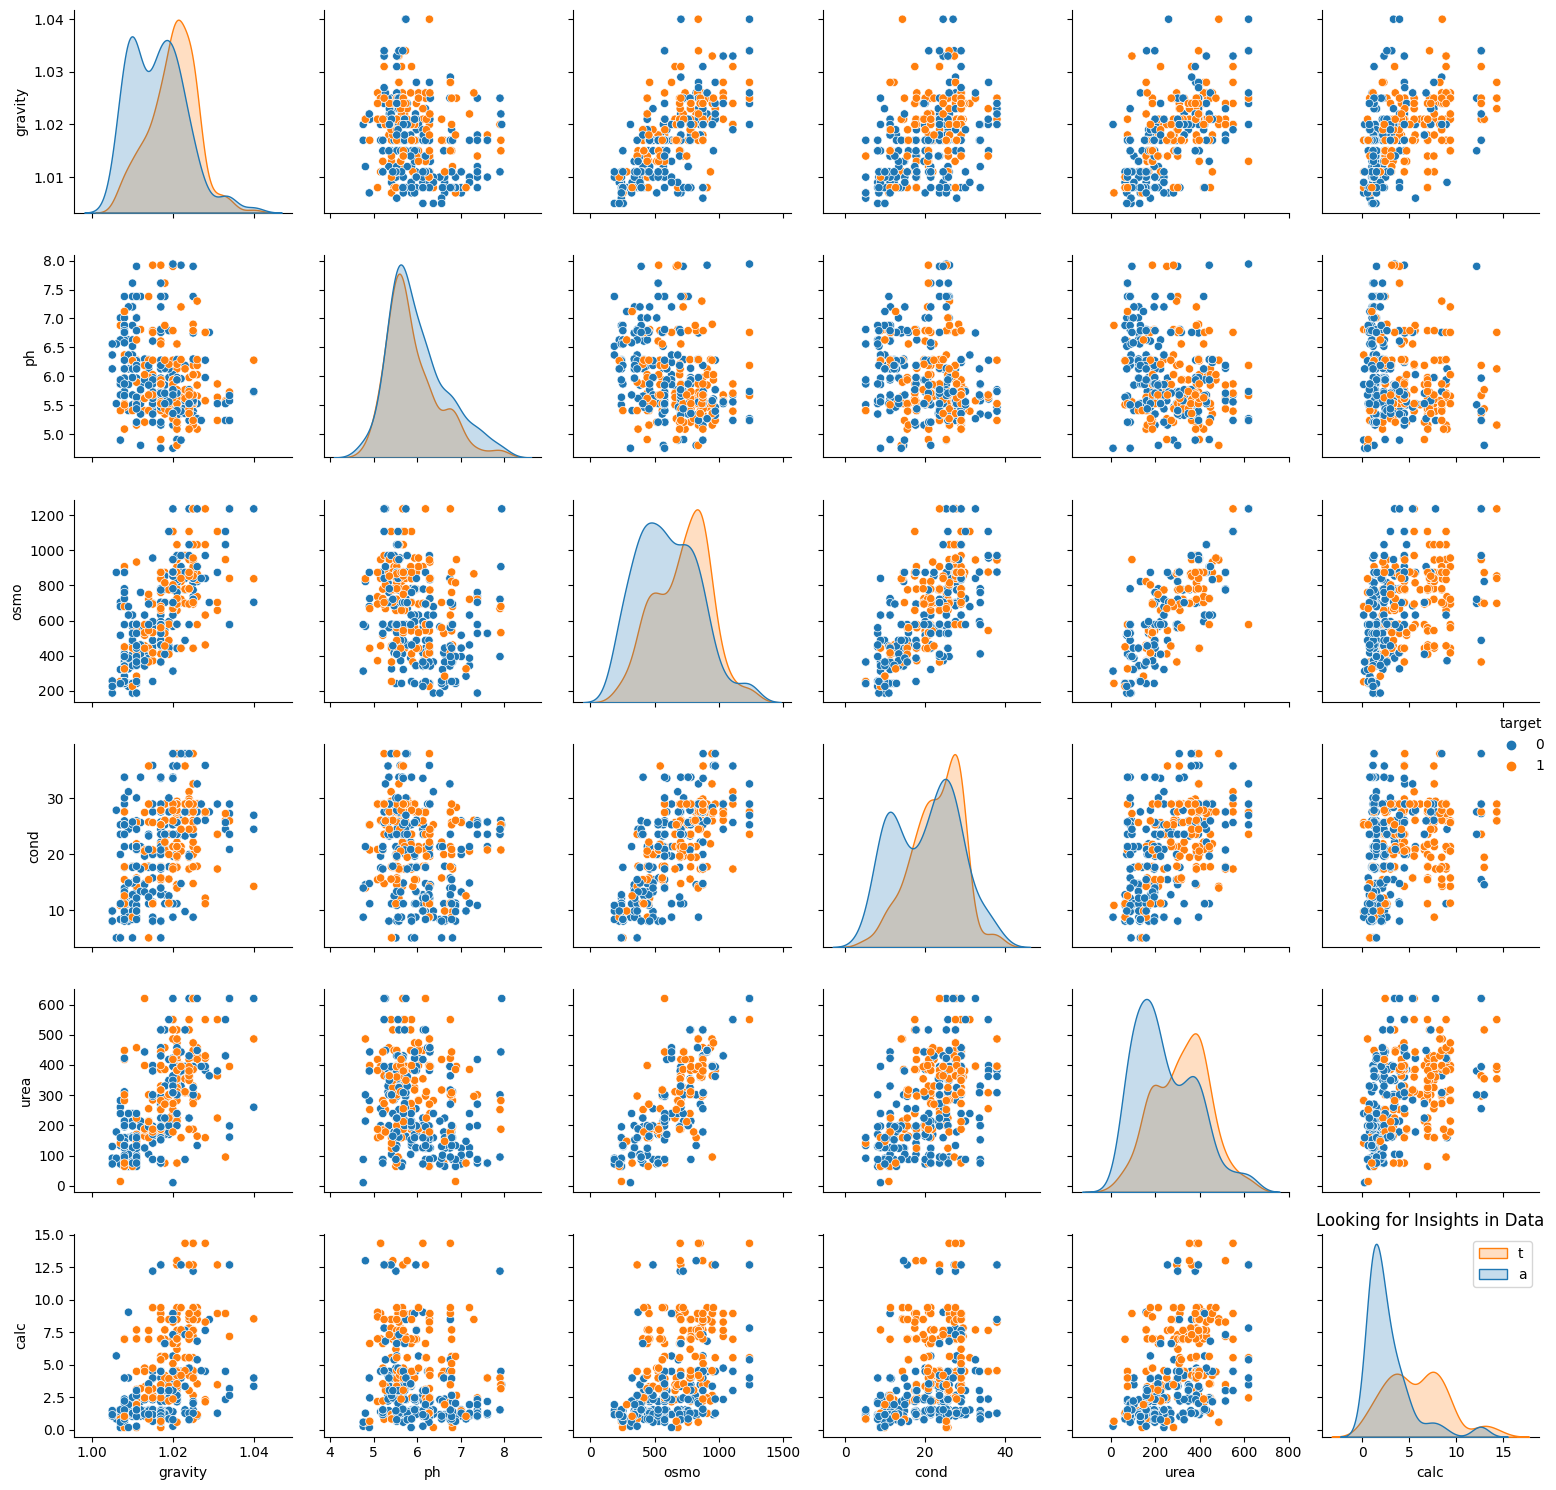

In [12]:
# Pair plots, also known as scatterplot matrices,
# are a type of data visualization that display 
# pairwise relationships between multiple variables 
# in a dataset.

plt.figure(figsize=(12,10))
sns.pairplot(train,hue="target")
plt.title("Looking for Insights in Data")
plt.legend("target")
plt.tight_layout()
plt.plot()
plt.show()

In [13]:
train.target.value_counts()

0    230
1    184
Name: target, dtype: int64

In [14]:


# Spliting source data into training and validation files using train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)
target = ['target']

# Feature and target column split
X_train, y_train = train.drop(columns=target), train[target]
X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(331, 6) (331, 1) (83, 6) (83, 1)


Building models - Decision Tree, Random Forest and XGBoost 

 ***************************************************************************
                  1. Decision Tree                                         
 ***************************************************************************

In [15]:

#build a pipeline for a Decision Tree, Random Forest and XGBoost 
model_dt_oe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(), 
    StandardScaler(),
    DecisionTreeClassifier(random_state=25))

model_dt_oe.fit(X_train, y_train)
score_dt_oe = model_dt_oe.score(X_val, y_val)


In [16]:
#build a pipeline for a Decision Tree, Random Forest and XGBoost 
model_dt_oh = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(),
    DecisionTreeClassifier(random_state=25))

model_dt_oh.fit(X_train, y_train)
score_dt_oh = model_dt_oh.score(X_val, y_val)


In [17]:

model_rf_oe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(), 
    StandardScaler(),
    RandomForestClassifier(n_jobs=-1, bootstrap = True, oob_score =True, random_state=25))

model_rf_oe.fit(X_train, y_train)
score_rf_oe = model_rf_oe.score(X_val, y_val)


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [18]:
model_rf_oh = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(),
    RandomForestClassifier(n_jobs=-1, bootstrap = True, oob_score =True, random_state=25))

model_rf_oh.fit(X_train, y_train)
score_rf_oh = model_rf_oh.score(X_val, y_val)



/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [19]:
model_xgb_oh = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(),
    XGBClassifier()
)
model_xgb_oh.fit(X_train, y_train)
score_xgb_oh = model_xgb_oh.score(X_val, y_val)

In [20]:
print('RandomForest OneHot, Validation Accuracy', score_rf_oh)
print('RandomForest OrdinalEncoder, Validation Accuracy', score_rf_oe)
print('Decision Tree OneHot, Validation Accuracy', score_dt_oh)
print('Decision Tree OrdinalEncoder, Validation Accuracy', score_dt_oe)
print('XGBoost OneHot , Validation Accuracy', score_xgb_oh)

RandomForest OneHot, Validation Accuracy 0.6987951807228916
RandomForest OrdinalEncoder, Validation Accuracy 0.6987951807228916
Decision Tree OneHot, Validation Accuracy 0.6626506024096386
Decision Tree OrdinalEncoder, Validation Accuracy 0.6626506024096386
XGBoost OneHot , Validation Accuracy 0.6626506024096386


In [21]:
k = 3
scores_rf = cross_val_score(model_rf_oh, X_train, y_train, cv=k, 
                         scoring='accuracy')


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [22]:
k = 3
scores_dt = cross_val_score(model_dt_oh, X_train, y_train, cv=k, 
                         scoring='accuracy')


In [23]:
k = 3
scores_xgb = cross_val_score(model_xgb_oh, X_train, y_train, cv=k, 
                         scoring='accuracy')


In [24]:
print(f'RandomForst Accuracy for {k} folds:', scores_rf)
print(f'DecisionTree Accuracy for {k} folds:', scores_dt)
print(f'XGBoost Accuracy for {k} folds:', scores_xgb)

RandomForst Accuracy for 3 folds: [0.72972973 0.75454545 0.69090909]
DecisionTree Accuracy for 3 folds: [0.59459459 0.67272727 0.58181818]
XGBoost Accuracy for 3 folds: [0.68468468 0.66363636 0.65454545]


***************************************************************************
                  2. Randon Forest                                         
 ***************************************************************************

In [25]:
model_rf = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(), 
    StandardScaler(),
    RandomForestClassifier(random_state=25))

In [26]:
# Param for RandomizedSearchCV
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': [20,50,100], 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': [3], 
}

# Hyperparameter tuning using RandomizedSearchCV
rf_rscv = RandomizedSearchCV(
    model_rf, 
    param_distributions=param_distributions, 
    n_iter=3, 
    cv=3, 
    scoring="accuracy", 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

rf_rscv.fit(X_train, y_train);

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Best hyperparameters {'simpleimputer__strategy': 'mean', 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__max_depth': 15}
Cross-validation MAE 0.7129129129129129


In [27]:
# Param for GridSearchCV
param_distributions = { 
      'simpleimputer__strategy': ['mean', 'median','mode'],
    'randomforestclassifier__n_estimators': [20,50,100], 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': [3], 
}

# Hyperparameter tuning using GridSearchCV
rf_gscv = GridSearchCV(
    model_rf, 
    param_grid =param_distributions, 
    n_jobs =3, 
    cv=None, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, )

rf_gscv.fit(X_train, y_train);


Fitting 5 folds for each of 45 candidates, totalling 225 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pa

In [29]:
print('GridSearchCV Best hyperparameters', rf_gscv.best_params_)
print('GridSearchCV Accuracy', rf_gscv.best_score_)
print('RandomizedSearchCV Best hyperparameters', rf_rscv.best_params_)
print('RandomizedSearchCV Accuracy', rf_rscv.best_score_)


GridSearchCV Best hyperparameters {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__n_estimators': 20, 'simpleimputer__strategy': 'mean'}
GridSearchCV Accuracy 0.7339665309814564
RandomizedSearchCV Best hyperparameters {'simpleimputer__strategy': 'median', 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__max_depth': 5}
RandomizedSearchCV Accuracy 0.7128583128583129


In [ ]:
y_pred = rf_gscv.predict(X_val)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.88%


In [ ]:
sample_submission.head()

,target
0,0.5
1,0.5
2,0.5
3,0.5
4,0.5


In [ ]:
y_pred = rf_gscv.predict(test)
y_pred_f = pd.DataFrame({'id': test1['id'], 'target': y_pred})
y_pred_f.head()
y_pred_f.to_csv('submission2.csv', index=False)

In [ ]:
y_pred_f.shape, test1.id.shape


((276, 1), (276,))

In [ ]:
test1 = pd.read_csv('test.csv')
test1.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
